In [1]:
from datetime import date, datetime, timedelta

from binance.binance_k_line_repository import load_k_lines

interval_days = 18
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

raw_k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(raw_k_lines)

Exception: No Binance data for ETHUSDT:2023-06-12.

In [ ]:
import pandas as pd

k_lines = raw_k_lines[["close_price"]]
k_lines.index = pd.to_datetime(raw_k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = "open_datetime"

k_lines

,close_price
open_datetime,
2023-05-22 00:00:00,1803.77
2023-05-22 00:01:00,1804.99
2023-05-22 00:02:00,1803.85
2023-05-22 00:03:00,1804.00
2023-05-22 00:04:00,1804.20
...,...
2023-06-08 23:55:00,1844.96
2023-06-08 23:56:00,1844.56
2023-06-08 23:57:00,1844.93


In [ ]:
from numpy import float16, float64

# TODO: revivce disabled validations

# assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] <= 0]) == 0

# display(
#     (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     ).value_counts()

# )

# assert (
#     (k_lines.index.to_series() - k_lines.index.to_series().shift(1))
#     .iloc[1:]
#     .dt.total_seconds()
#     == 60
# ).all()

<Axes: xlabel='open_datetime'>

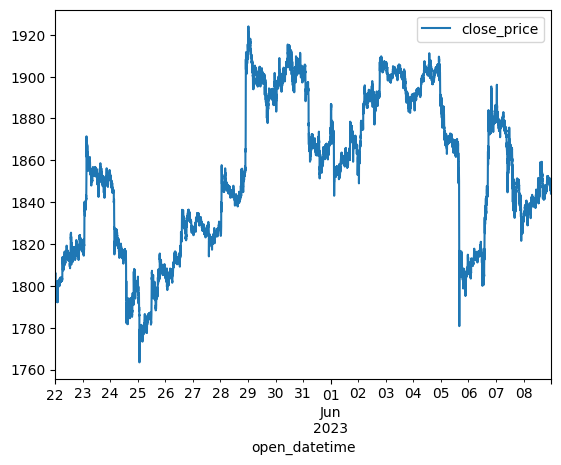

In [ ]:
k_lines.plot.line(use_index=True)

In [ ]:
k_lines_features = k_lines.copy()

k_lines_features["previous_close_price_mean_1_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(1).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).mean()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_mean_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).mean()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_std_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).std()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_std_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).std()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_min_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).min()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_min_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).min()
    / k_lines_features["close_price"]
)

k_lines_features["previous_close_price_max_2_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(2).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_4_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(4).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_8_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(8).max()
    / k_lines_features["close_price"]
)
k_lines_features["previous_close_price_max_16_ratio"] = (
    k_lines_features["close_price"].shift(1).rolling(16).max()
    / k_lines_features["close_price"]
)


k_lines_features["is_next_close_price_greater"] = (
    k_lines_features["close_price"]
    .shift(-1)
    .rolling(2)
    .apply(lambda x: x.iloc[1] > x.iloc[0])
)

k_lines_features.dropna(inplace=True)

display(k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-22 00:16:00,1805.70,1.000150,1.000224,1.000234,1.000173,0.999745,0.000106,0.000072,0.000084,0.000499,1.000150,1.000150,1.000078,0.998931,1.000299,1.000299,1.000299,1.000299,1.0
2023-05-22 00:17:00,1805.73,0.999983,1.000058,1.000168,1.000142,0.999795,0.000106,0.000140,0.000103,0.000452,0.999983,0.999983,0.999983,0.998959,1.000133,1.000282,1.000282,1.000282,0.0
2023-05-22 00:18:00,1804.44,1.000715,1.000707,1.000815,1.000849,1.000535,0.000012,0.000139,0.000112,0.000451,1.000698,1.000698,1.000698,0.999673,1.000715,1.000998,1.000998,1.000998,1.0
2023-05-22 00:19:00,1804.73,0.999839,1.000197,1.000404,1.000589,1.000395,0.000505,0.000383,0.000322,0.000416,0.999839,0.999839,0.999839,0.999596,1.000554,1.000687,1.000837,1.000837,0.0
2023-05-22 00:20:00,1804.67,1.000033,0.999953,1.000266,1.000535,1.000454,0.000114,0.000367,0.000378,0.000374,0.999873,0.999873,0.999873,0.999740,1.000033,1.000587,1.000870,1.000870,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08 23:54:00,1844.54,0.999691,1.000030,1.000355,1.000615,1.000734,0.000479,0.000474,0.000424,0.000346,0.999691,0.999691,0.999691,0.999691,1.000369,1.000786,1.000992,1.001079,1.0
2023-06-08 23:55:00,1844.96,0.999772,0.999618,0.999931,1.000299,1.000460,0.000218,0.000392,0.000473,0.000391,0.999463,0.999463,0.999463,0.999463,0.999772,1.000347,1.000764,1.000851,0.0
2023-06-08 23:56:00,1844.56,1.000217,1.000103,1.000061,1.000420,1.000624,0.000161,0.000296,0.000442,0.000393,0.999989,0.999680,0.999680,0.999680,1.000217,1.000358,1.000895,1.000981,1.0


In [ ]:
test_k_lines_ratio = 0.2
test_k_lines_count = round(test_k_lines_ratio * len(k_lines_features))

train_k_lines_features = k_lines_features.iloc[:-test_k_lines_count]
test_k_lines_features = k_lines_features.iloc[-test_k_lines_count:]

display(train_k_lines_features)
display(test_k_lines_features)

,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-05-22 00:16:00,1805.70,1.000150,1.000224,1.000234,1.000173,0.999745,0.000106,0.000072,0.000084,0.000499,1.000150,1.000150,1.000078,0.998931,1.000299,1.000299,1.000299,1.000299,1.0
2023-05-22 00:17:00,1805.73,0.999983,1.000058,1.000168,1.000142,0.999795,0.000106,0.000140,0.000103,0.000452,0.999983,0.999983,0.999983,0.998959,1.000133,1.000282,1.000282,1.000282,0.0
2023-05-22 00:18:00,1804.44,1.000715,1.000707,1.000815,1.000849,1.000535,0.000012,0.000139,0.000112,0.000451,1.000698,1.000698,1.000698,0.999673,1.000715,1.000998,1.000998,1.000998,1.0
2023-05-22 00:19:00,1804.73,0.999839,1.000197,1.000404,1.000589,1.000395,0.000505,0.000383,0.000322,0.000416,0.999839,0.999839,0.999839,0.999596,1.000554,1.000687,1.000837,1.000837,0.0
2023-05-22 00:20:00,1804.67,1.000033,0.999953,1.000266,1.000535,1.000454,0.000114,0.000367,0.000378,0.000374,0.999873,0.999873,0.999873,0.999740,1.000033,1.000587,1.000870,1.000870,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05 09:33:00,1870.22,1.000102,1.000070,1.000138,0.999991,0.999995,0.000045,0.000088,0.000219,0.000199,1.000037,1.000037,0.999588,0.999588,1.000102,1.000241,1.000241,1.000241,0.0
2023-06-05 09:34:00,1869.72,1.000267,1.000318,1.000345,1.000273,1.000263,0.000072,0.000075,0.000215,0.000199,1.000267,1.000267,0.999856,0.999856,1.000369,1.000439,1.000508,1.000508,1.0
2023-06-05 09:35:00,1869.75,0.999984,1.000118,1.000219,1.000275,1.000221,0.000189,0.000162,0.000177,0.000204,0.999984,0.999984,0.999984,0.999840,1.000251,1.000353,1.000492,1.000492,1.0


,close_price,previous_close_price_mean_1_ratio,previous_close_price_mean_2_ratio,previous_close_price_mean_4_ratio,previous_close_price_mean_8_ratio,previous_close_price_mean_16_ratio,previous_close_price_std_2_ratio,previous_close_price_std_4_ratio,previous_close_price_std_8_ratio,previous_close_price_std_16_ratio,previous_close_price_min_2_ratio,previous_close_price_min_4_ratio,previous_close_price_min_8_ratio,previous_close_price_min_16_ratio,previous_close_price_max_2_ratio,previous_close_price_max_4_ratio,previous_close_price_max_8_ratio,previous_close_price_max_16_ratio,is_next_close_price_greater
open_datetime,,,,,,,,,,,,,,,,,,,
2023-06-05 09:38:00,1869.51,1.000016,1.000083,1.000102,1.000279,1.000274,0.000095,0.000059,0.000200,0.000210,1.000016,1.000016,1.000016,0.999968,1.000150,1.000150,1.000551,1.000620,0.0
2023-06-05 09:39:00,1869.48,1.000016,1.000024,1.000090,1.000227,1.000262,0.000011,0.000076,0.000188,0.000215,1.000016,1.000016,1.000016,0.999984,1.000032,1.000166,1.000497,1.000637,1.0
2023-06-05 09:40:00,1870.14,0.999647,0.999655,0.999701,0.999820,0.999907,0.000011,0.000076,0.000182,0.000217,0.999647,0.999647,0.999647,0.999631,0.999663,0.999813,1.000144,1.000283,1.0
2023-06-05 09:41:00,1870.18,0.999979,0.999802,0.999726,0.999780,0.999896,0.000250,0.000169,0.000150,0.000217,0.999626,0.999626,0.999626,0.999610,0.999979,0.999979,1.000021,1.000262,0.0
2023-06-05 09:42:00,1870.12,1.000032,1.000021,0.999844,0.999810,0.999934,0.000015,0.000206,0.000145,0.000219,1.000011,0.999658,0.999658,0.999642,1.000032,1.000032,1.000032,1.000294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08 23:54:00,1844.54,0.999691,1.000030,1.000355,1.000615,1.000734,0.000479,0.000474,0.000424,0.000346,0.999691,0.999691,0.999691,0.999691,1.000369,1.000786,1.000992,1.001079,1.0
2023-06-08 23:55:00,1844.96,0.999772,0.999618,0.999931,1.000299,1.000460,0.000218,0.000392,0.000473,0.000391,0.999463,0.999463,0.999463,0.999463,0.999772,1.000347,1.000764,1.000851,0.0
2023-06-08 23:56:00,1844.56,1.000217,1.000103,1.000061,1.000420,1.000624,0.000161,0.000296,0.000442,0.000393,0.999989,0.999680,0.999680,0.999680,1.000217,1.000358,1.000895,1.000981,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_input_columns = [
    "close_price",
    "previous_close_price_mean_1_ratio",
    "previous_close_price_mean_2_ratio",
    "previous_close_price_mean_4_ratio",
    "previous_close_price_mean_8_ratio",
    "previous_close_price_mean_16_ratio",
    "previous_close_price_std_2_ratio",
    "previous_close_price_std_4_ratio",
    "previous_close_price_std_8_ratio",
    "previous_close_price_std_16_ratio",
    "previous_close_price_min_2_ratio",
    "previous_close_price_min_4_ratio",
    "previous_close_price_min_8_ratio",
    "previous_close_price_min_16_ratio",
    "previous_close_price_max_2_ratio",
    "previous_close_price_max_4_ratio",
    "previous_close_price_max_8_ratio",
    "previous_close_price_max_16_ratio",
]
model_target_column = "is_next_close_price_greater"

model_train_input_values = train_k_lines_features[model_input_columns]
model_train_target_values = train_k_lines_features[model_target_column]
model_test_input_values = test_k_lines_features[model_input_columns]
model_test_target_values = test_k_lines_features[model_target_column]

model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=300,
    random_state=1,
)
model.fit(model_train_input_values, model_train_target_values)

model_test_predicted_values = pd.Series(
    model.predict(model_test_input_values), index=test_k_lines_features.index
)
model_train_predicted_values = pd.Series(
    model.predict(model_train_input_values), index=train_k_lines_features.index
)

model_test_predicted_values.name = f"predicted_{model_target_column}"
model_test_target_and_predicted_values = pd.concat(
    [model_test_target_values, model_test_predicted_values], axis=1
)
# display(model_test_target_and_predicted_values)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

display(
    "test_accuracy_score = "
    + str(accuracy_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_accuracy_score = "
    + str(accuracy_score(model_train_target_values, model_train_predicted_values))
)

display(
    "test_precision_score = "
    + str(precision_score(model_test_target_values, model_test_predicted_values))
)

display(
    "train_precision_score = "
    + str(precision_score(model_train_target_values, model_train_predicted_values))
)


# display(precision_score(model_test_target_values, model_test_predicted_values))
# display(recall_score(model_test_target_values, model_test_predicted_values))
# display(f1_score(model_test_target_values, model_test_predicted_values))

'test_accuracy_score = 0.523065045358039'

'train_accuracy_score = 0.7067368014670399'

'test_precision_score = 0.5240566037735849'

'train_precision_score = 0.7426725684890537'

In [ ]:
display(
    pd.concat(
        [
            model_test_target_values.value_counts(),
            model_test_predicted_values.value_counts(),
        ],
        axis=1,
    )
)

,is_next_close_price_greater,predicted_is_next_close_price_greater
0.0,2608,3061
1.0,2573,2120
